pip install ucimlrepo

In [155]:
#from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import plotly.express as pdf

# Raw data is on my git
df =pd.read_csv("https://raw.githubusercontent.com/myadarishireesha/Machine-Learning-and-Data-Mining/refs/heads/main/Obesity.csv",delimiter=",")
df.head(5)
# Select only categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

# Feature Extraction
#X = df.drop(columns=["Weight"])
#y = df["Weight"]

binary_cols =['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
le=LabelEncoder()
for col in binary_cols:
    df[col]=le.fit_transform(df[col])

ordinal_cols = ['CAEC', 'CALC']

# Define the order of categories
frq_order = [['no', 'Sometimes', 'Frequently' ,'Always']]   #we have to give the order to avoid misleadings
frq_order = [['no', 'Sometimes', 'Frequently' ,'Always']]

ordinal_encoder = OrdinalEncoder(categories=frq_order)

for col in ordinal_cols:
    df[col]=ordinal_encoder.fit_transform(df[[col]])



# Define transformations
preprocessor = ColumnTransformer([
    ("Sc",StandardScaler(), ["Age","Height","FCVC","NCP","CH2O","FAF","TUE","Weight"]),
    ("KSc", OneHotEncoder(drop='first'), ["MTRANS","NObeyesdad"]),
    ("LeSc",StandardScaler(),['Gender','family_history_with_overweight','FAVC','SMOKE','SCC','CAEC', 'CALC'])
])

# Apply transformations
df_Sc= preprocessor.fit_transform(df)

# Convert back to DataFrame
feature_names = preprocessor.get_feature_names_out()
Scaled_df = pd.DataFrame(df_Sc, columns=feature_names)


Scaled_df.head()
#Scaled_df.describe()


# Feature Extraction
X = Scaled_df.drop(columns=["Sc__Weight"])
y = Scaled_df["Sc__Weight"]
#Scaled_df.columns
X.head()






Gender: ['Female' 'Male']
family_history_with_overweight: ['yes' 'no']
FAVC: ['no' 'yes']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


,Sc__Age,Sc__Height,Sc__FCVC,Sc__NCP,Sc__CH2O,Sc__FAF,Sc__TUE,KSc__MTRANS_Bike,KSc__MTRANS_Motorbike,KSc__MTRANS_Public_Transportation,...,KSc__NObeyesdad_Obesity_Type_III,KSc__NObeyesdad_Overweight_Level_I,KSc__NObeyesdad_Overweight_Level_II,LeSc__Gender,LeSc__family_history_with_overweight,LeSc__FAVC,LeSc__SMOKE,LeSc__SCC,LeSc__CAEC,LeSc__CALC
0,-0.522124,-0.875589,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,0.0,1.0,...,0.0,0.0,0.0,-1.011914,0.472291,-2.759769,-0.145900,-0.218272,-0.300346,-1.419172
1,-0.522124,-1.947599,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,0.0,1.0,...,0.0,0.0,0.0,-1.011914,0.472291,-2.759769,6.853997,4.581439,-0.300346,0.521160
2,-0.206889,1.054029,-0.785019,0.404153,-0.013073,1.163820,0.561997,0.0,0.0,1.0,...,0.0,0.0,0.0,0.988227,0.472291,-2.759769,-0.145900,-0.218272,-0.300346,2.461491
3,0.423582,1.054029,1.088342,0.404153,-0.013073,1.163820,-1.080625,0.0,0.0,0.0,...,0.0,1.0,0.0,0.988227,-2.117337,-2.759769,-0.145900,-0.218272,-0.300346,2.461491
4,-0.364507,0.839627,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,0.0,0.0,1.0,...,0.0,0.0,1.0,0.988227,-2.117337,-2.759769,-0.145900,-0.218272,-0.300346,0.521160


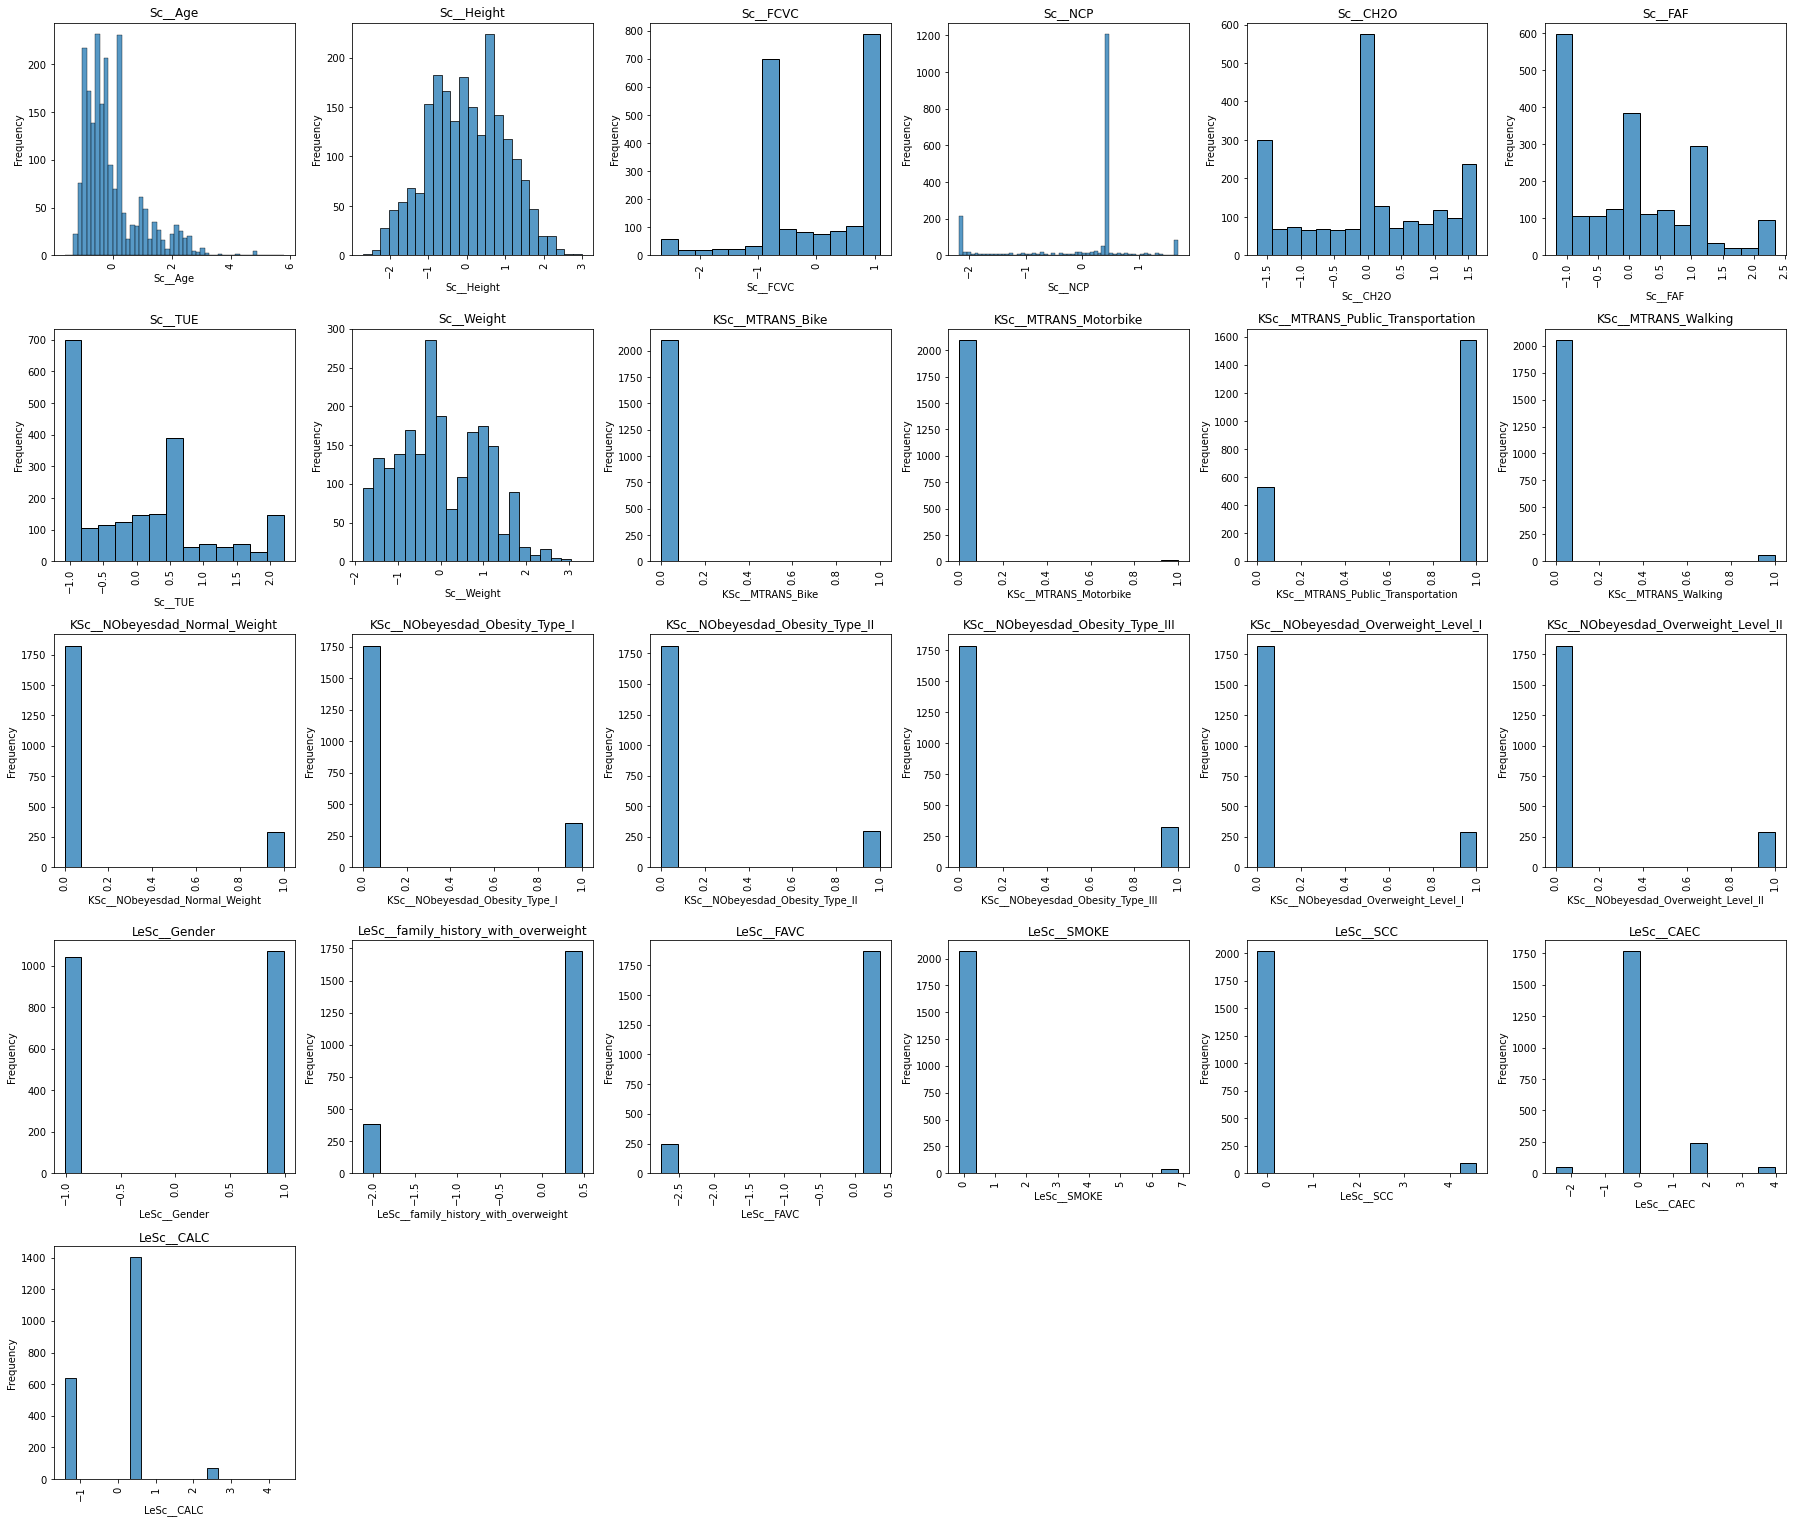

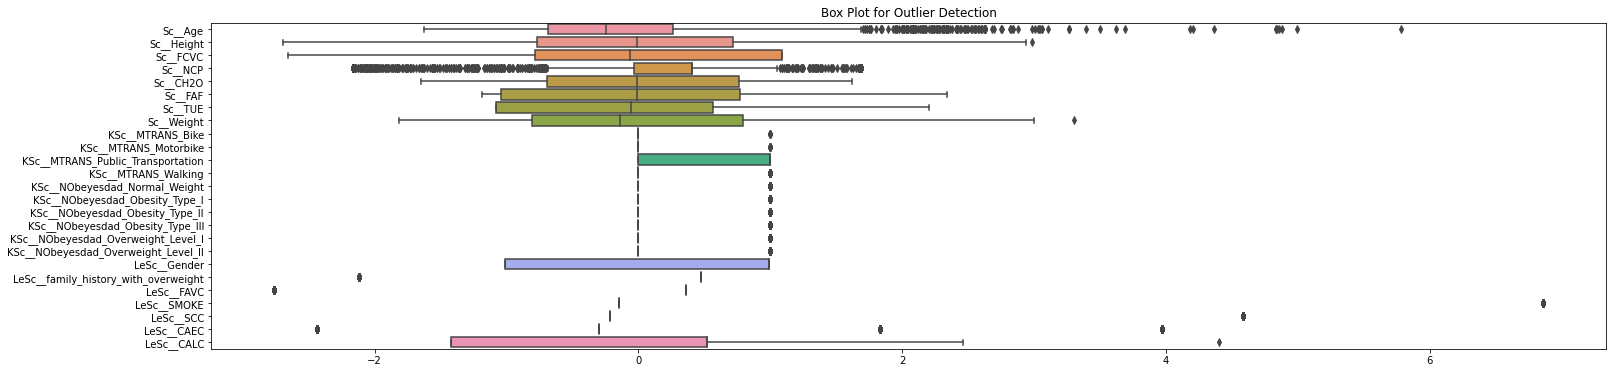

Explained variance ratio: [0.14456508 0.1124819  0.08936614 0.0858878  0.07562905 0.07108778
 0.06541862 0.0553753  0.05375992 0.05102842]
PC1: 0.1446 (14.46%)
PC2: 0.1125 (11.25%)
PC3: 0.0894 (8.94%)
PC4: 0.0859 (8.59%)
PC5: 0.0756 (7.56%)
PC6: 0.0711 (7.11%)
PC7: 0.0654 (6.54%)
PC8: 0.0554 (5.54%)
PC9: 0.0538 (5.38%)
PC10: 0.0510 (5.10%)


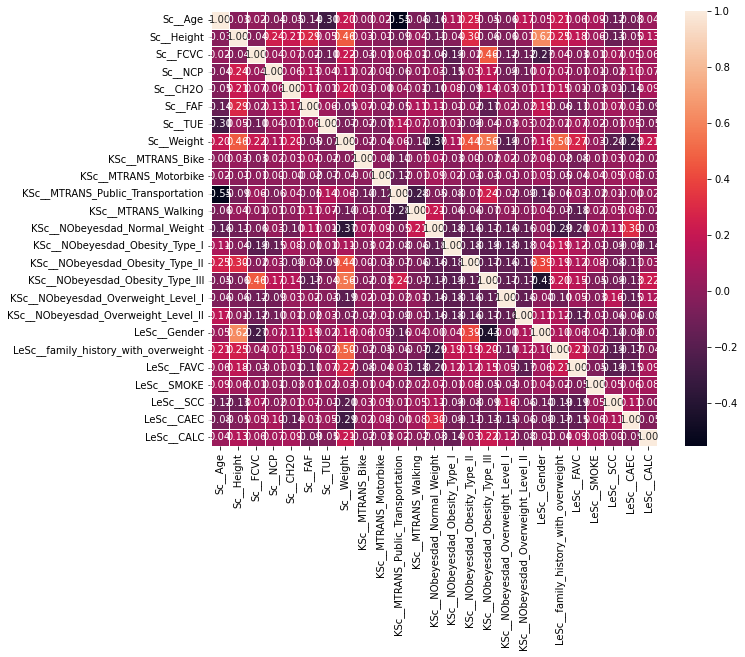

In [149]:
#-----------Data Visualization
def plot_distributions(df):
  
    numerical_columns = df.select_dtypes(include=['float64', 'int64','object']).columns

    plt.figure(figsize=(25, 25))
    
    for i, column in enumerate( numerical_columns,1):
        plt.subplot(6, 6, i)  # Adjust the grid size
        sns.histplot(df[column])
        plt.title(f'{column}')
        plt.xticks(rotation=90)
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Call function
plot_distributions(Scaled_df)
#-----------------------------------------------

plt.figure(figsize=(25, 6))
sns.boxplot(data=Scaled_df, orient='h')
plt.title("Box Plot for Outlier Detection")
plt.show()

#----------------------------------------------------------
corr_matridf = Scaled_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matridf, annot=True, fmt=".2f", linewidths=0.5)


#------------------------PCA ---------------------------------------------
pca = PCA(n_components=0.8)  # using all features 95% varience

df_pca = pca.fit_transform(X)
#df_pca = pd.DataFrame(X_sc, columns=X_sc.columns, index=X_sc.index) 

explained_variance = pca.explained_variance_ratio_

# Check edfplained variance
print("Explained variance ratio:", explained_variance)
#print("New shape:", df_pca.shape)

for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.4f} ({var * 100:.2f}%)")




# TRAIN MODEL FROM HERE 
* Then split features X and target : Y i not yet done.
* Split train and test sets
* Model Configuration
*Train the model  find intercept,sploe,Train accuracy_score, 
* Test: predict,Test accuracy_score
* Error analysis : output = Y_test(original data) - Y_predicted
* 3 types of errors:1.mean_absolute_error,2.mean_absolute_percentage_error,3.mean_squared_error 
* Lasso, Ridge Regresser, Elastic

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
import math
from sklearn.metrics import accuracy_score, r2_score

# Feature Extraction
X = Scaled_df.drop(columns=["Sc__Weight"])
y = Scaled_df["Sc__Weight"]
#Scaled_df.columns
X.head()

#data_X, data_Y = oversample.fit_resample(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=100) 

print("X Training set size:", X_train.shape)
print("Y_train size",Y_train.shape)
print("X Testing set size:", X_test.shape)

print("Y_test size",Y_test.shape)

X_train.head()

Y_test.head()

X Training set size: (1477, 24)
Y_train size (1477,)
X Testing set size: (634, 24)
Y_test size (634,)


785    -0.824368
1838    2.646023
2083    1.011692
1105    0.395616
361    -0.251521
Name: Sc__Weight, dtype: float64

In [198]:
#convering it to dataframe inorder to sort the indexes.
actuals = pd.DataFrame(Y_test)

actuals.reset_index(inplace=True)

actuals.head()

,index,Sc__Weight
0,785,-0.824368
1,1838,2.646023
2,2083,1.011692
3,1105,0.395616
4,361,-0.251521


In [ ]:


# Model Training Phase
lr = LinearRegression()
lr.fit(X_train,Y_train)   # model trained

print(f"model coefficients are:{lr.coef_} \n intercept is: {lr.intercept_} \n Training Score is:{lr.score(X_train,Y_train)}")
#coefficients depicts the importance of the feature.higher value high imp.
#sign does not matter bcz it takes magnitude

# Model Testing Phase
predicted = lr.predict(X_test)
predictions = pd.DataFrame(predicted, columns=["Pr_Weight"])
error=actuals.Sc__Weight- predictions.Pr_Weight
error

#To see the results in df ACTUAL vs PREDICTED values  --not required
pd.concat([pd.DataFrame(actuals["Sc__Weight"]),predictions,error], axis=1)


mse= mean_squared_error(actuals.Sc__Weight, predictions.Pr_Weight)
rmse=math.sqrt(mse)
print(f"mse: {mse} \n rmse:{rmse}")
print("test accuracy is ", r2_score(actuals.Sc__Weight, predictions.Pr_Weight))


model coefficients are:[-2.94262404e-02  3.47643202e-01  3.10353409e-03 -2.18457347e-02
  8.50711496e-03  2.23488130e-02  6.34824215e-03 -1.20190284e-01
  3.92253496e-02 -5.11636423e-02 -6.79908819e-02  5.25478642e-01
  1.69655824e+00  2.29066429e+00  2.81235611e+00  9.88878619e-01
  1.24090925e+00 -9.89939964e-03 -1.98601329e-02 -1.08043653e-02
  2.54592238e-03 -3.86417201e-03  1.62148329e-02  1.02357943e-02] 
 intercept is: -1.3725891284713283 
 Training Score is:0.9634280594908574
mse: 0.03856640520737988 
 rmse:0.1963833119370887
test accuracy is  0.9593645782973008


c:\Users\Shireesha myadari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Shireesha myadari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sc__Height', ylabel='Sc__Weight'>

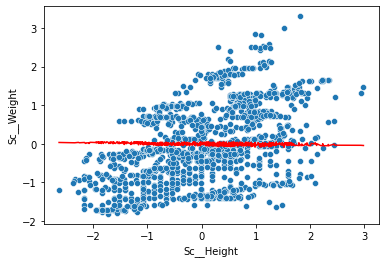

In [ ]:

sns.scatterplot(X_train['Sc__Height'],Y_train)

3sns.lineplot(X_train['Sc__Height'],-2.94262404e-02*Y_train, color='red')

# Cross Validation K=10 fold

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=30)
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')
generalization_error = -np.mean(scores)  # Convert negative MSE to positive

# Print generalization error
print("Generalization Error (MSE):", generalization_error)

Generalization Error (MSE): 0.03876241723981703


In [137]:
# RIDGE REGRESSION
from sklearn.linear_model import  LinearRegression , Ridge
RR = Ridge(alpha=10000,  solver="saga", random_state=7777, max_iter=20000)

RR.fit(X_train,Y_train)
RR.intercept_
RR.score(X_train,Y_train)


#alpha--penalty parameter
#solver=algorithm using by model-stochastic average Gradient Descent Advanced
#random state=to shuffle the data for ech iteraion
#max_iter= no. of time that machine runs for loop to learn it

predicted = RR.predict(X_test)  # give an array
#predictions = pd.DataFrame(predicted, columns=["Pr_Weight"])  #convert too dataframe

error=Y_test- predicted
#this is array so, we need to convert into dataframe
#actuals = pd.DataFrame(Y_test)
#actuals.reset_index(inplace=True)
#actuals.Sc__Weight

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
import math
from sklearn.metrics import accuracy_score, r2_score

mse= mean_squared_error(Y_test, predicted)

rmse=math.sqrt(mse)
print(mse,"  ,  ",rmse)
print("test accuracy is ", r2_score(Y_test, predicted))

0.7599978938494776   ,   0.8717785807471284
test accuracy is  0.1992296211256137
